In [28]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")


In [29]:
features=['sepal length','sepal width','petal length','petal width']
url="https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

In [30]:
df=pd.read_csv(url,names=['sepal length','sepal width','petal length','petal width','target'])
print(df.head())

   sepal length  sepal width  petal length  petal width       target
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [31]:
#separate the features
x=df.loc[:,features].values

#separating out the target
y=df.loc[:,['target']].values

In [32]:
#standardize the features
x=StandardScaler().fit_transform(x)

print(x)

[[-9.00681170e-01  1.03205722e+00 -1.34127240e+00 -1.31297673e+00]
 [-1.14301691e+00 -1.24957601e-01 -1.34127240e+00 -1.31297673e+00]
 [-1.38535265e+00  3.37848329e-01 -1.39813811e+00 -1.31297673e+00]
 [-1.50652052e+00  1.06445364e-01 -1.28440670e+00 -1.31297673e+00]
 [-1.02184904e+00  1.26346019e+00 -1.34127240e+00 -1.31297673e+00]
 [-5.37177559e-01  1.95766909e+00 -1.17067529e+00 -1.05003079e+00]
 [-1.50652052e+00  8.00654259e-01 -1.34127240e+00 -1.18150376e+00]
 [-1.02184904e+00  8.00654259e-01 -1.28440670e+00 -1.31297673e+00]
 [-1.74885626e+00 -3.56360566e-01 -1.34127240e+00 -1.31297673e+00]
 [-1.14301691e+00  1.06445364e-01 -1.28440670e+00 -1.44444970e+00]
 [-5.37177559e-01  1.49486315e+00 -1.28440670e+00 -1.31297673e+00]
 [-1.26418478e+00  8.00654259e-01 -1.22754100e+00 -1.31297673e+00]
 [-1.26418478e+00 -1.24957601e-01 -1.34127240e+00 -1.44444970e+00]
 [-1.87002413e+00 -1.24957601e-01 -1.51186952e+00 -1.44444970e+00]
 [-5.25060772e-02  2.18907205e+00 -1.45500381e+00 -1.31297673e

In [20]:
pca=PCA(n_components=2)
principalComponents=pca.fit_transform(x)

In [33]:
principalDf=pd.DataFrame(data=principalComponents,
                        columns=['principal Component 1','principal component 2'])
print(principalDf.head())

   principal Component 1  principal component 2
0              -2.264542               0.505704
1              -2.086426              -0.655405
2              -2.367950              -0.318477
3              -2.304197              -0.575368
4              -2.388777               0.674767


In [34]:
finalDf=pd.concat([principalDf,df[['target']]],axis=1)
print(finalDf.head())

   principal Component 1  principal component 2       target
0              -2.264542               0.505704  Iris-setosa
1              -2.086426              -0.655405  Iris-setosa
2              -2.367950              -0.318477  Iris-setosa
3              -2.304197              -0.575368  Iris-setosa
4              -2.388777               0.674767  Iris-setosa


KeyError: 'Principal Component 1'

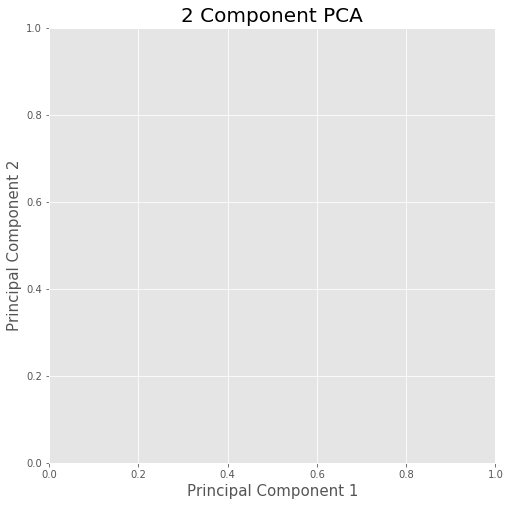

In [39]:
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1',fontsize=15)
ax.set_ylabel('Principal Component 2',fontsize=15)
ax.set_title('2 Component PCA',fontsize=20)
targets=['Iris-setosa','Iris-versicolor','Iris-virginica']
colors=['r','g','b']
for target,color in zip(targets,colors):
    indicesToKeep=finalDf['target']==target
    ax.scatter(finalDf.loc[indicesToKeep,'Principal Component 1'],
               finalDf.loc[indicesToKeep,'Principal Component 2'],
               c=color,s=50)
ax.legend(targets)
ax.grid()
ax.show()
